In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('abalone.csv')
df.head(10)

,0,1,2,3,4,5,6,7,8
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14


In [60]:
df.shape

(4176, 9)

In [61]:
df.dtypes

0     object
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8      int64
dtype: object

In [62]:
#lets check null values
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

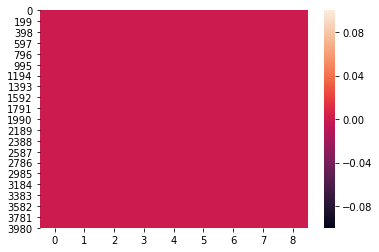

In [63]:
#lets check again null values by heatmap
sns.heatmap(df.isnull())

In [64]:
#lets check the skewness of the data
df.skew()

1   -0.640240
2   -0.609457
3    3.129241
4    0.530576
5    0.718724
6    0.591463
7    0.620547
8    1.115157
dtype: float64

In [65]:
#lets check the number of categories in fisrt column
df['0'].value_counts()

M    1527
I    1342
F    1307
Name: 0, dtype: int64

In [66]:
#lets convert this into numerical values
df1 = pd.get_dummies(df['0'],drop_first=True)

In [67]:
df1.head()

,I,M
0,0,1
1,0,0
2,0,1
3,1,0
4,1,0


In [68]:
#lets concat it into our main dataframe
df = pd.concat([df,df1],axis=1)
df.head(10)

,0,1,2,3,4,5,6,7,8,I,M
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,1,0
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,0,0
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,0,0
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,0,1
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,0,0
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14,0,0


In [69]:
#lets drop that categorical column as well
df.drop(['0'],axis=1,inplace=True)

In [70]:
#here we can see the clean dataset ready
df.head()

,1,2,3,4,5,6,7,8,I,M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,1,0


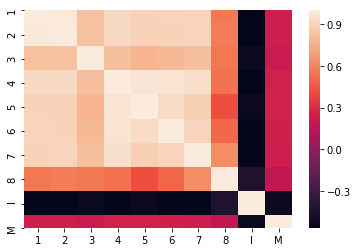

In [71]:
#lets check correlation
sns.heatmap(df.corr())

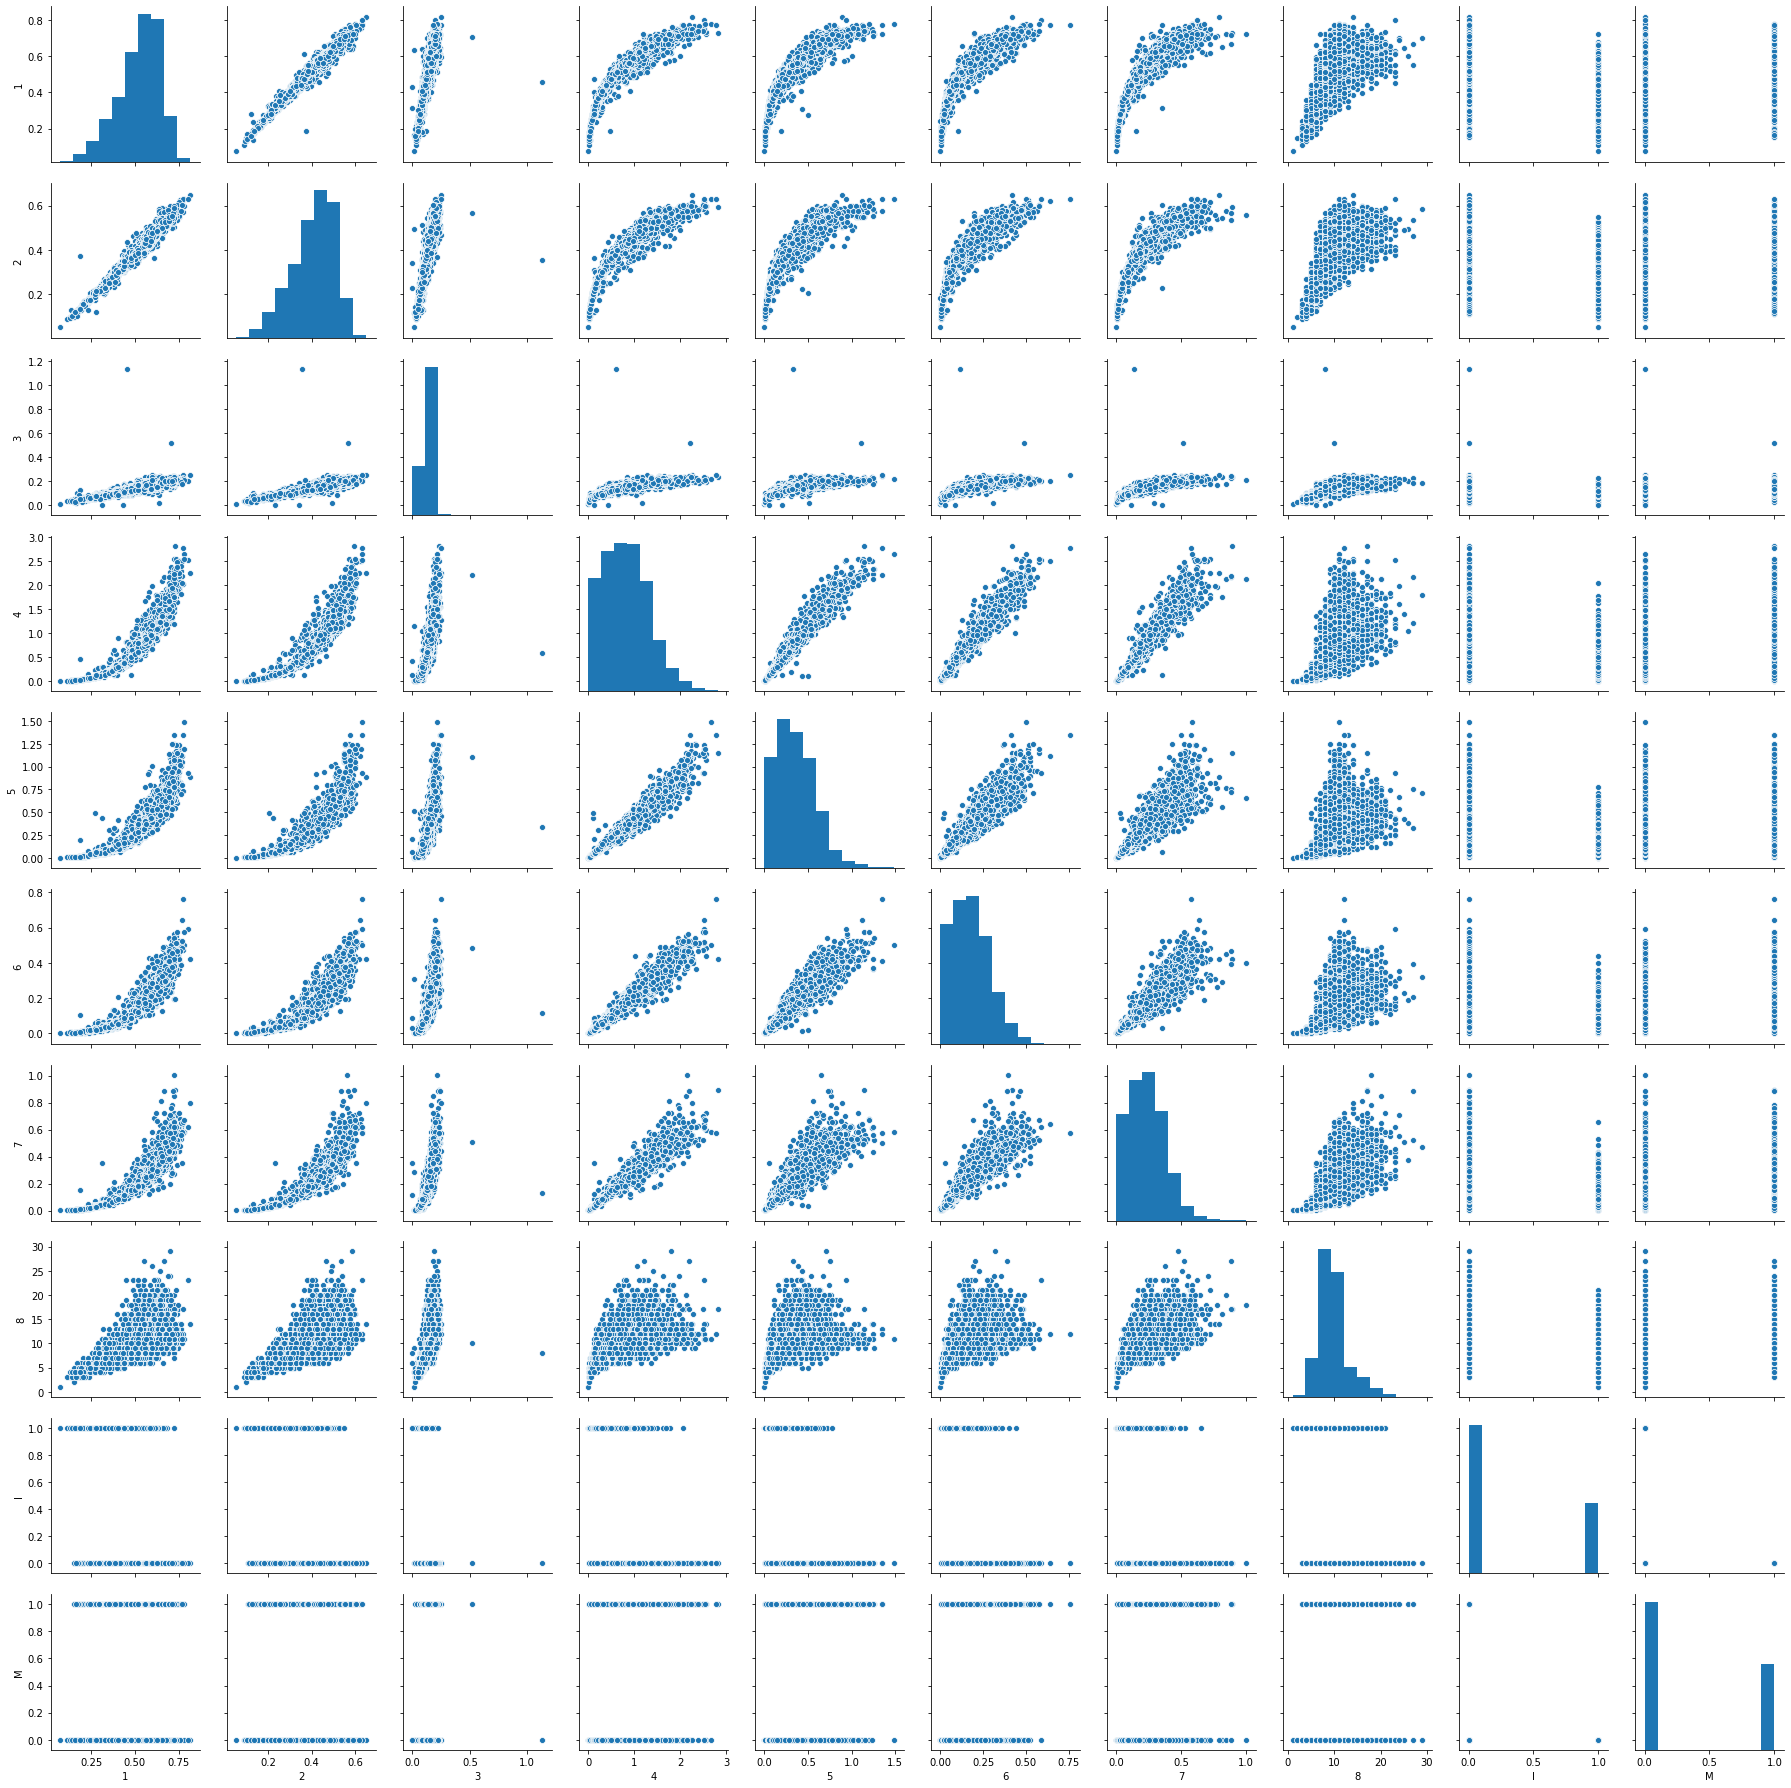

In [72]:
#now it looks good enough for the next steps
#lets explore some more information by using pairplot
sns.pairplot(df)
plt.show()
#here you can see the graph is actually showing a regression problem so as per the business problem 
#we are going to apply Linear regression for the prediction

In [73]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(4176, 10)
(4026, 10)


In [83]:
#lets check the skewness
df.skew()

1   -0.640240
2   -0.609457
3    3.129241
4    0.530576
5    0.718724
6    0.591463
7    0.620547
8    1.115157
I    0.765330
M    0.558070
dtype: float64

In [86]:
#change the values in each columns by replacing log1 values
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [87]:
#lets check the skewness
df.skew()

1   -0.640240
2   -0.609457
3    0.351037
4    0.530576
5    0.306070
6    0.375234
7    0.314939
8   -0.061065
I    0.765330
M    0.558070
dtype: float64

In [88]:
#lets separate x and y
df_x = df_final.drop(columns=["8"],axis=1)
y = df_final[["8"]]

In [89]:
#lets do Standar Scaling to scaled a data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [90]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [91]:
print(x_train.shape,x_test.shape)

(2818, 9) (1208, 9)


In [92]:
print(y_train.shape,y_test.shape)

(2818, 1) (1208, 1)


In [107]:
#lets create a function to call 

def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr > max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max r2 corrosponding to ",final_r_state," is ",max_r_score)
    return final_r_state    
    
    


In [108]:
#lets apply first algorithm
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.47199940999061674
r2 score corresponding to 43 is 0.5083750544795194
r2 score corresponding to 44 is 0.5259605925865458
r2 score corresponding to 45 is 0.5557997952258718
r2 score corresponding to 46 is 0.49892599177856
r2 score corresponding to 47 is 0.5399379533223546
r2 score corresponding to 48 is 0.5104093119457385
r2 score corresponding to 49 is 0.5081980960049959
r2 score corresponding to 50 is 0.5555212222958779
r2 score corresponding to 51 is 0.5202223751391983
r2 score corresponding to 52 is 0.5037743914819908
r2 score corresponding to 53 is 0.5395091274898327
r2 score corresponding to 54 is 0.514595129474648
r2 score corresponding to 55 is 0.5350519442750087
r2 score corresponding to 56 is 0.5530365925564238
r2 score corresponding to 57 is 0.5018205201278817
r2 score corresponding to 58 is 0.508514606192978
r2 score corresponding to 59 is 0.515047550932675
r2 score corresponding to 60 is 0.5533669288716457
r2 score corresponding to 61 is 0.4

In [109]:
#here we can see that we have to use other algorithms to improve the model

In [110]:
#lets go for the next model and find out the best parameter
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors = {"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors , cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 18}

In [111]:
#lets apply and get the r2 score
knr = KNeighborsRegressor(n_neighbors=18)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.4832501408811668
r2 score corresponding to 43 is 0.5351645090118835
r2 score corresponding to 44 is 0.5373805958012905
r2 score corresponding to 45 is 0.5620088088483691
r2 score corresponding to 46 is 0.4947352520578173
r2 score corresponding to 47 is 0.5334353788816544
r2 score corresponding to 48 is 0.4995600332056376
r2 score corresponding to 49 is 0.5099868827279032
r2 score corresponding to 50 is 0.5296370198388127
r2 score corresponding to 51 is 0.4831949273321645
r2 score corresponding to 52 is 0.4975046185223706
r2 score corresponding to 53 is 0.5239665443382197
r2 score corresponding to 54 is 0.5036798947677859
r2 score corresponding to 55 is 0.5303863654176222
r2 score corresponding to 56 is 0.5177857430691095
r2 score corresponding to 57 is 0.49398944982729076
r2 score corresponding to 58 is 0.530512765372475
r2 score corresponding to 59 is 0.5096664903686047
r2 score corresponding to 60 is 0.5384662608798179
r2 score corresponding to 61 is

In [113]:
#lets check mean r2 score of both of linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print("mean r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("mean r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

mean r2 score of linear regression is  0.4376906958322044
mean standard deviation in r2 score of linear regression is  0.0933422926104777

mean r2 score of knn regression is  0.44192178743818433
mean standard deviation in r2 score of knn regression is  0.08237642351601751


In [114]:
#lets check laso regression 
from sklearn.linear_model import Lasso
lsreg = Lasso()
parameters = {"alpha":[0.001,0.01,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [115]:
lsreg = Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.47891830382737444
r2 score corresponding to 43 is 0.5098137429398413
r2 score corresponding to 44 is 0.5208100576873436
r2 score corresponding to 45 is 0.5549403868604974
r2 score corresponding to 46 is 0.49436054656677275
r2 score corresponding to 47 is 0.5351803674359954
r2 score corresponding to 48 is 0.5060375955196476
r2 score corresponding to 49 is 0.5134269842063596
r2 score corresponding to 50 is 0.5542593753490203
r2 score corresponding to 51 is 0.5165972393537872
r2 score corresponding to 52 is 0.49902880574952124
r2 score corresponding to 53 is 0.5359965723828424
r2 score corresponding to 54 is 0.5158897952195101
r2 score corresponding to 55 is 0.5284205933795458
r2 score corresponding to 56 is 0.545141050896464
r2 score corresponding to 57 is 0.5027136599223665
r2 score corresponding to 58 is 0.5191231163353636
r2 score corresponding to 59 is 0.5120320629013626
r2 score corresponding to 60 is 0.5522547149602295
r2 score corresponding to 61 

In [116]:
print("mean r2 score of Lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of Lasso regression is ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print()

mean r2 score of Lasso regression is  0.43666127024455037
mean standard deviation in r2 score of Lasso regression is  0.09361074201361105



In [121]:
#now we will try to use gradiant boosting techniques
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf = GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [122]:
gbr = GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
print("mean r2 score of gb regression is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of gb regression is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print()

mean r2 score of gb regression is  0.4758939423733796
mean standard deviation in r2 score of gb regression is  0.07874918053349449



In [127]:
#after applying these algorithms i came to know that Linear regression model is a good one 
#So i will go ahead with Linear regression model 

from sklearn.externals import joblib


In [128]:
joblib.dump(lreg, 'Abadon_Model.pkl')

['Abadon_Model.pkl']